In [ ]:
from IPython import get_ipython
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from google.colab import files

uploaded = files.upload()
pd.set_option('display.max_columns', None)
data = pd.read_csv("drug_consumption.csv")
data = data.drop('ID', axis=1)
data.head()

Saving drug_consumption.csv to drug_consumption.csv


,Age,Gender,Education,Country,Ethinicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphete,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
data.isna().sum().sum()
print(f'Original shape of data with {data.shape[0]} rows and {data.shape[1]} columns')
data.query("Semer != 'CL0'") #fake drug
# We will drop overclaimers since, there answers might not truly be accurate
data = data.drop(data[data['Semer'] != 'CL0'].index)
# We will also drop unnecesary columns
data = data.drop(['Choc','Semer'], axis=1)
data = data.reset_index(drop=True)
data.head()

Original shape of data with 1885 rows and 31 columns


,Age,Gender,Education,Country,Ethinicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphete,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstacy,Heroin,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


In [ ]:
drugs = ['Alcohol',
         'Amphete',
         'Amyl',
         'Benzos',
         'Caff',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstacy',
         'Heroin',
         'Ketamine',
         'LegalH',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]

def drug_encoder(x):
    if x == 'CL0':
        return float(0) #converting it all to float to avoid datatype errors
    elif x == 'CL1':
        return float(1)
    elif x == 'CL2':
        return float(2)
    elif x == 'CL3':
        return float(3)
    elif x == 'CL4':
        return float(4)
    elif x == 'CL5':
        return float(5)
    elif x == 'CL6':
        return float(6)
    else:
        return 7
for column in drugs:
    data[column] = data[column].apply(drug_encoder)
data.head()

,Age,Gender,Education,Country,Ethinicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphete,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstacy,Heroin,Ketamine,LegalH,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5.0,2.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5.0,2.0,2.0,0.0,6.0,4.0,3.0,0.0,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4.0,0.0,0.0,3.0,5.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4.0,1.0,1.0,0.0,6.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0


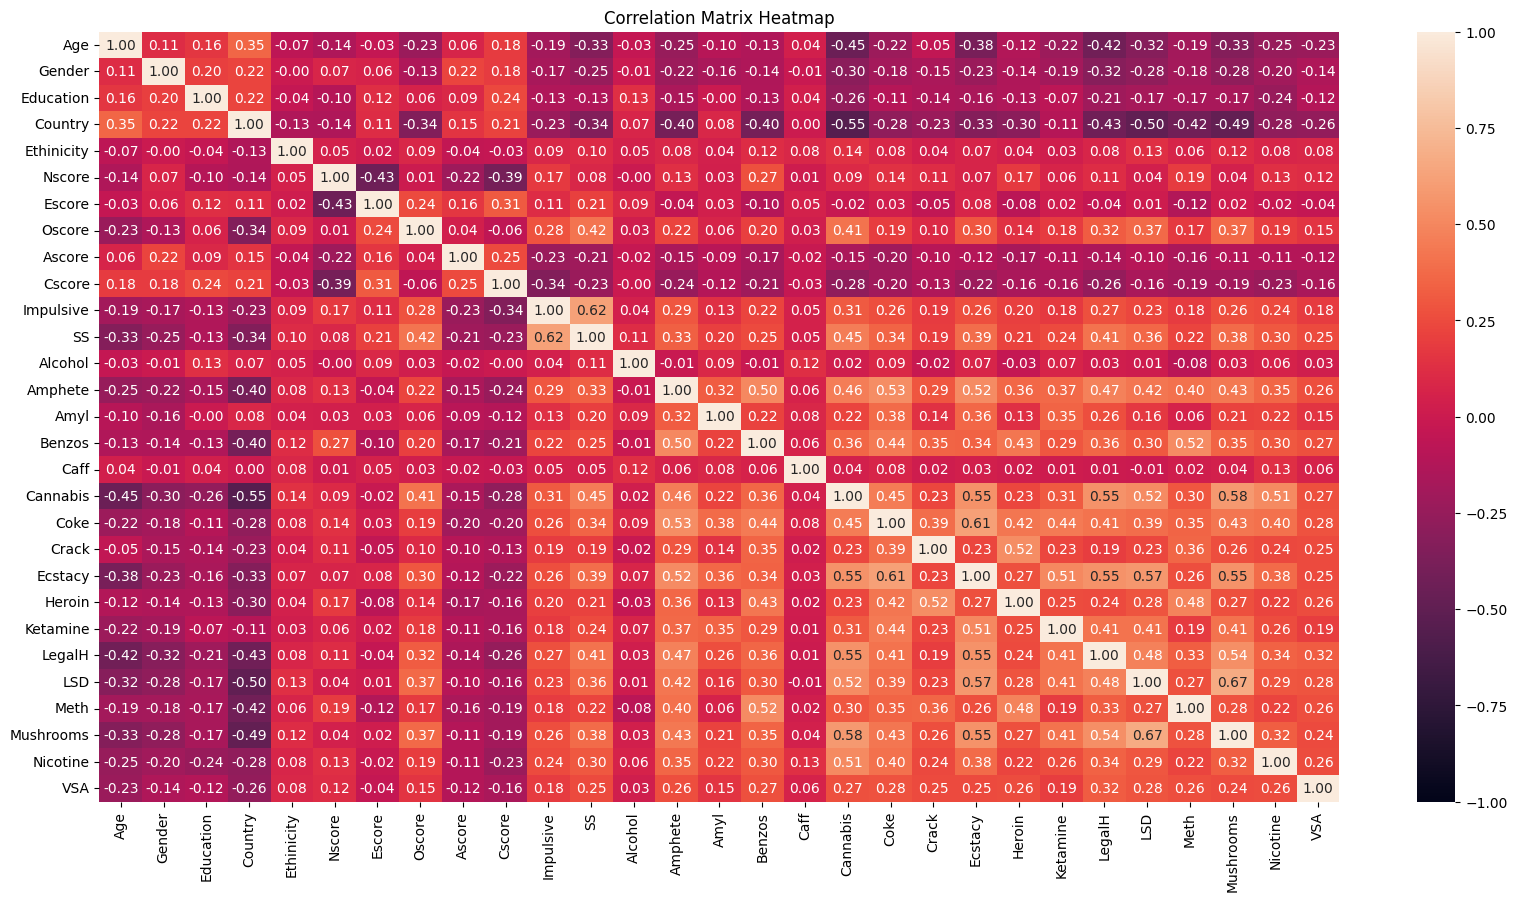

In [ ]:
corrmatrix = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corrmatrix, annot=True, vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
def preprocessing_inputs(df, column):
    df = df.copy()
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train),
                           index=X_train.index,
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),
                          index=X_test.index,
                          columns=X_test.columns)
    return X_train, X_test, y_train, y_test

Processing: Alcohol
Training models...
Logistic Regression - Accuracy: 97.61%, F1-Score: 0.98785
Ridge Classifier - Accuracy: 97.34%, F1-Score: 0.98652
Support Vector Machines - Accuracy: 97.34%, F1-Score: 0.98652
Random Forest Classifier - Accuracy: 97.34%, F1-Score: 0.98652
XGBoost - Accuracy: 97.07%, F1-Score: 0.98516
Gradient Boost - Accuracy: 96.01%, F1-Score: 0.97965
Best Model for Alcohol: Logistic Regression with Accuracy 97.6064% with F1 Score: 0.9879


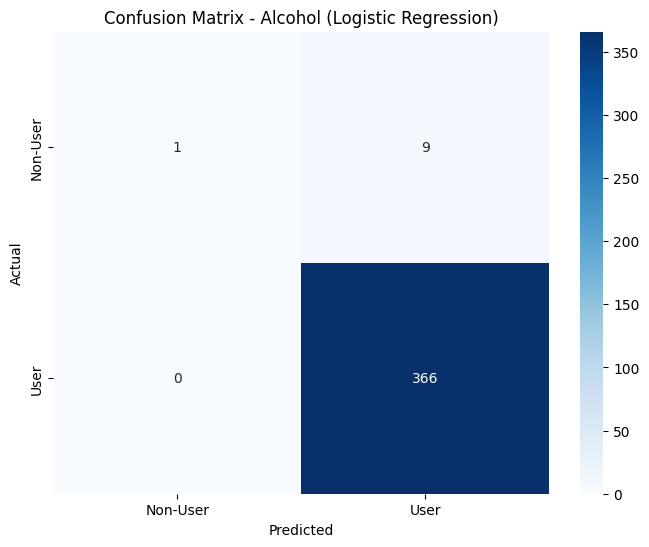

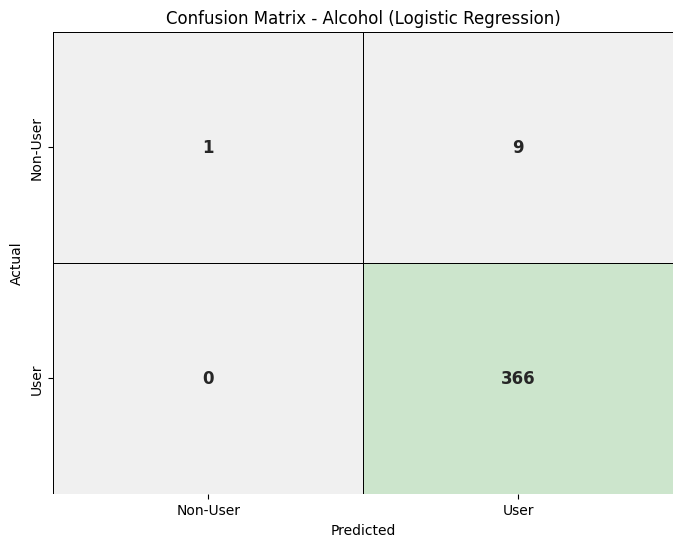


--------------------------------------------------

Processing: Amphete
Training models...
Logistic Regression - Accuracy: 84.31%, F1-Score: 0.78229
Ridge Classifier - Accuracy: 83.78%, F1-Score: 0.77323
Support Vector Machines - Accuracy: 85.11%, F1-Score: 0.80282
Random Forest Classifier - Accuracy: 86.17%, F1-Score: 0.81159
XGBoost - Accuracy: 84.31%, F1-Score: 0.787
Gradient Boost - Accuracy: 85.64%, F1-Score: 0.80576
Best Model for Amphete: Random Forest Classifier with Accuracy 86.1702% with F1 Score: 0.8116


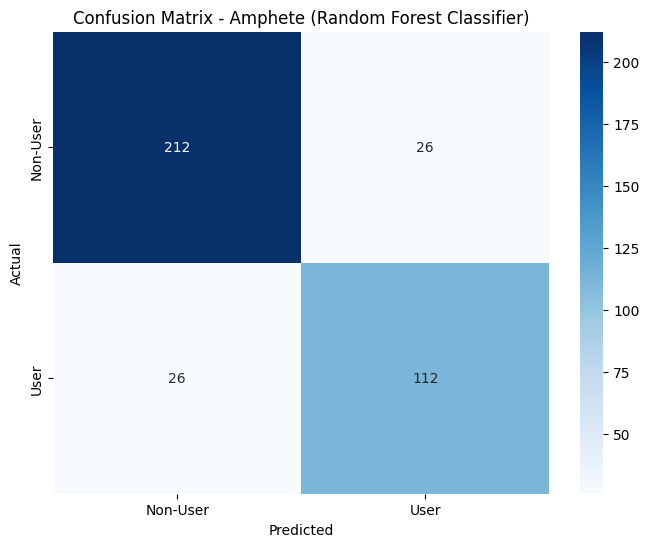

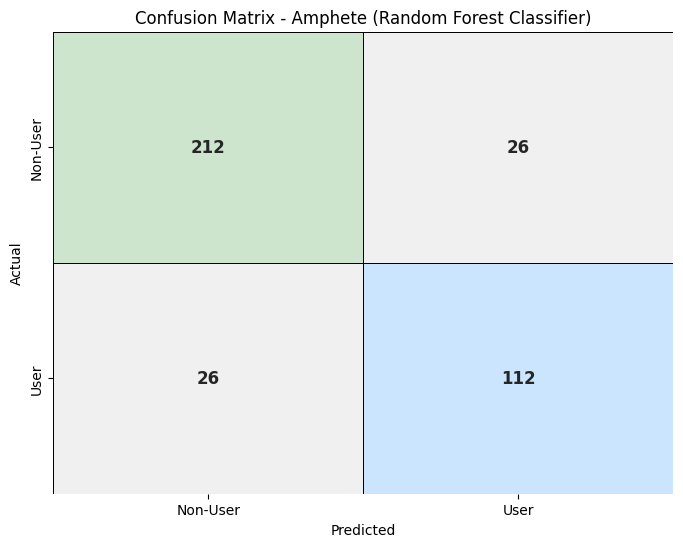


--------------------------------------------------

Processing: Amyl
Training models...
Logistic Regression - Accuracy: 82.18%, F1-Score: 0.48855
Ridge Classifier - Accuracy: 82.71%, F1-Score: 0.44444
Support Vector Machines - Accuracy: 83.78%, F1-Score: 0.49587
Random Forest Classifier - Accuracy: 84.84%, F1-Score: 0.55118
XGBoost - Accuracy: 82.98%, F1-Score: 0.52941
Gradient Boost - Accuracy: 84.31%, F1-Score: 0.56296
Best Model for Amyl: Gradient Boost with Accuracy 84.8404% with F1 Score: 0.5630


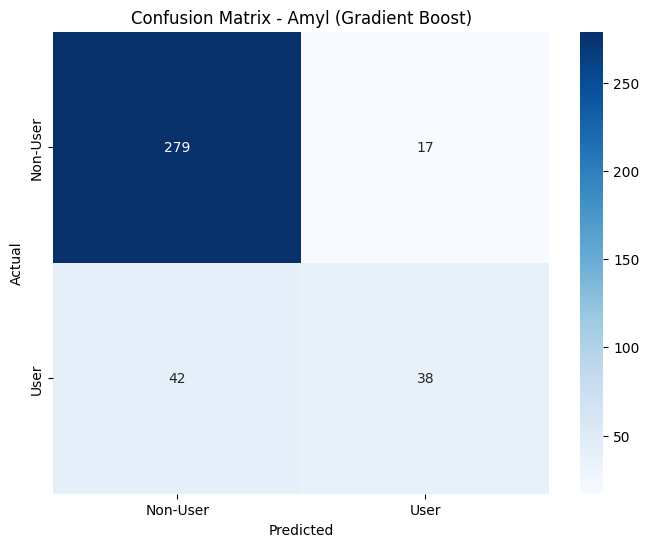

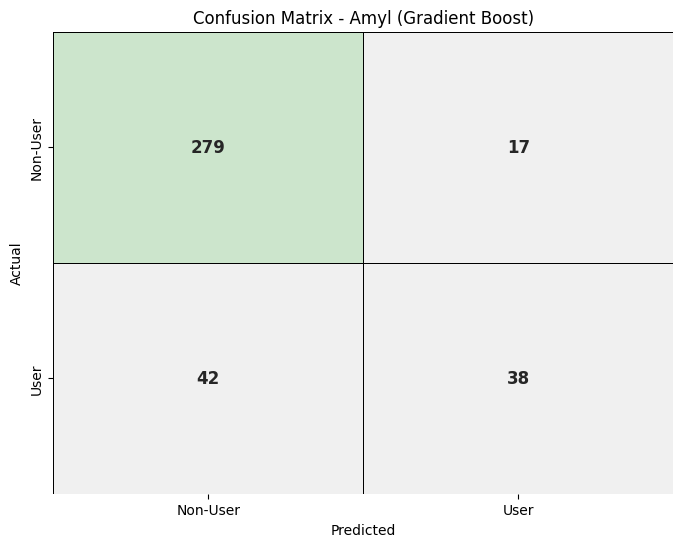


--------------------------------------------------

Processing: Benzos
Training models...
Logistic Regression - Accuracy: 78.72%, F1-Score: 0.72028
Ridge Classifier - Accuracy: 79.26%, F1-Score: 0.72143
Support Vector Machines - Accuracy: 77.66%, F1-Score: 0.69784
Random Forest Classifier - Accuracy: 78.19%, F1-Score: 0.70922
XGBoost - Accuracy: 75.00%, F1-Score: 0.67808
Gradient Boost - Accuracy: 77.39%, F1-Score: 0.69751
Best Model for Benzos: Ridge Classifier with Accuracy 79.2553% with F1 Score: 0.7214


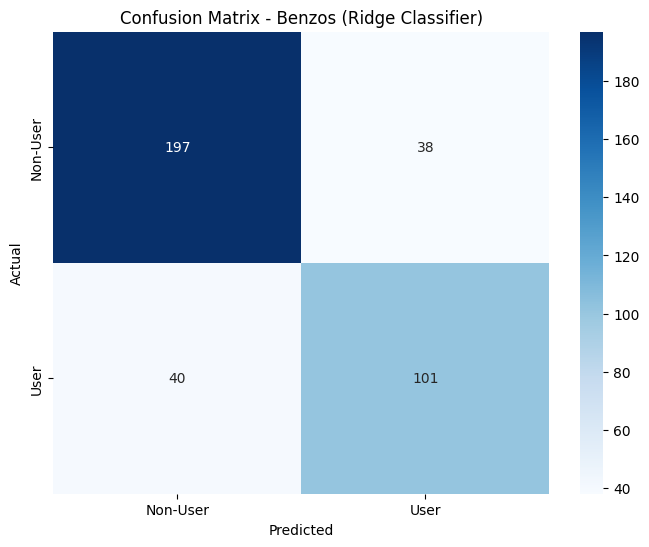

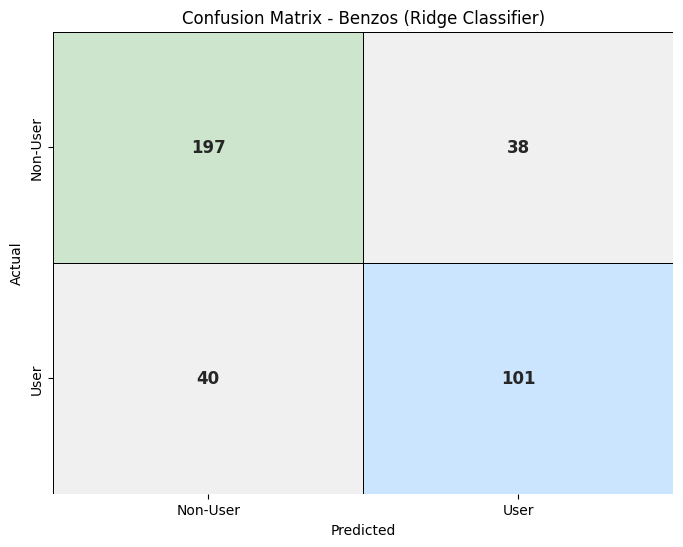


--------------------------------------------------

Processing: Caff
Training models...
Logistic Regression - Accuracy: 97.87%, F1-Score: 0.98925
Ridge Classifier - Accuracy: 97.87%, F1-Score: 0.98925
Support Vector Machines - Accuracy: 97.87%, F1-Score: 0.98925
Random Forest Classifier - Accuracy: 97.87%, F1-Score: 0.98925
XGBoost - Accuracy: 97.87%, F1-Score: 0.98925
Gradient Boost - Accuracy: 97.87%, F1-Score: 0.98925
Best Model for Caff: Logistic Regression with Accuracy 97.8723% with F1 Score: 0.9892


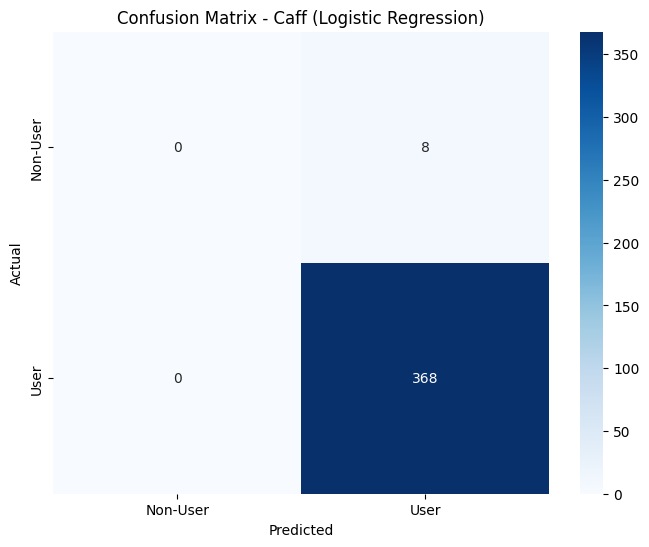

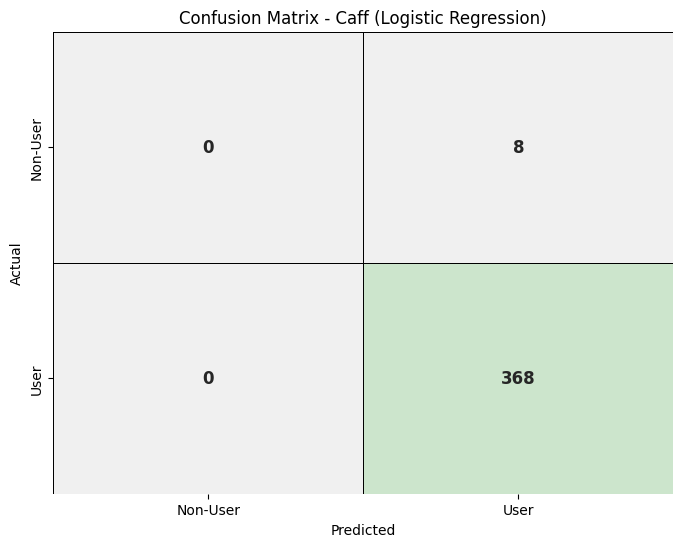


--------------------------------------------------

Processing: Cannabis
Training models...
Logistic Regression - Accuracy: 87.23%, F1-Score: 0.90438
Ridge Classifier - Accuracy: 85.64%, F1-Score: 0.89069
Support Vector Machines - Accuracy: 88.30%, F1-Score: 0.91304
Random Forest Classifier - Accuracy: 88.56%, F1-Score: 0.91715
XGBoost - Accuracy: 86.70%, F1-Score: 0.90196
Gradient Boost - Accuracy: 88.30%, F1-Score: 0.91406
Best Model for Cannabis: Random Forest Classifier with Accuracy 88.5638% with F1 Score: 0.9171


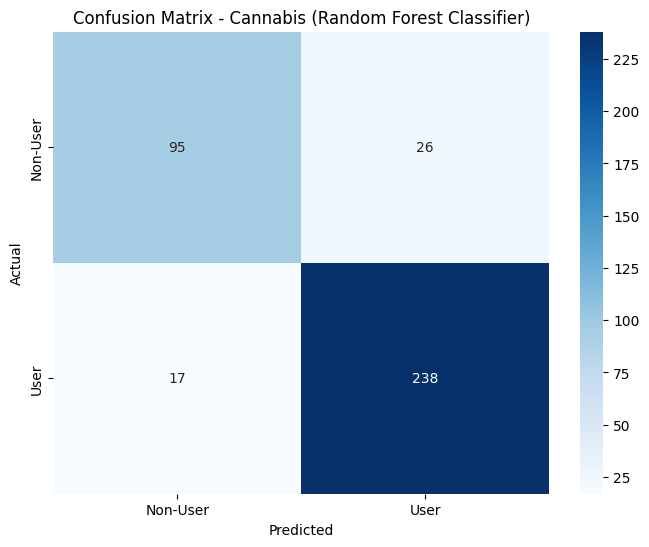

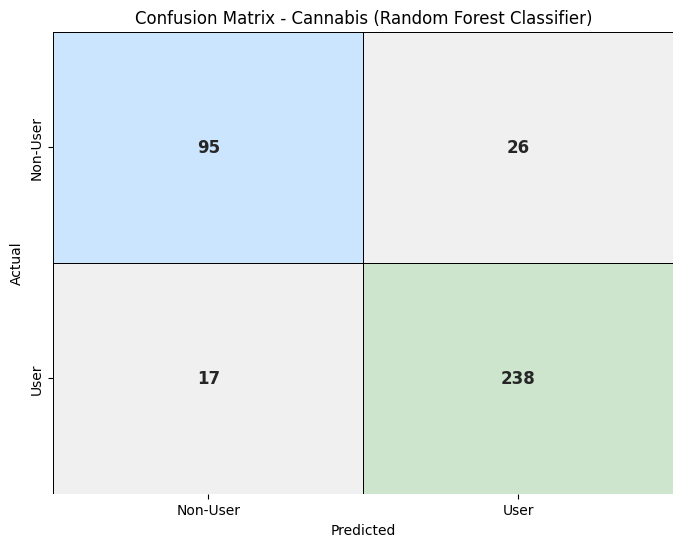


--------------------------------------------------

Processing: Coke
Training models...
Logistic Regression - Accuracy: 81.65%, F1-Score: 0.75269
Ridge Classifier - Accuracy: 82.18%, F1-Score: 0.75093
Support Vector Machines - Accuracy: 82.18%, F1-Score: 0.76491
Random Forest Classifier - Accuracy: 86.17%, F1-Score: 0.81944
XGBoost - Accuracy: 82.98%, F1-Score: 0.77305
Gradient Boost - Accuracy: 85.11%, F1-Score: 0.80282
Best Model for Coke: Random Forest Classifier with Accuracy 86.1702% with F1 Score: 0.8194


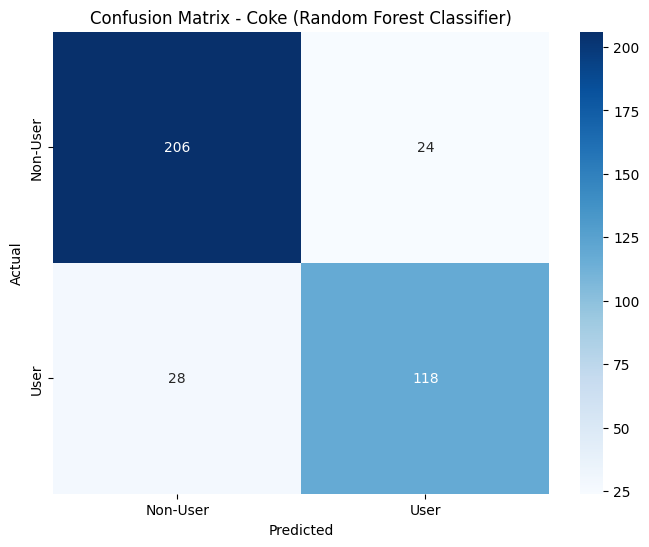

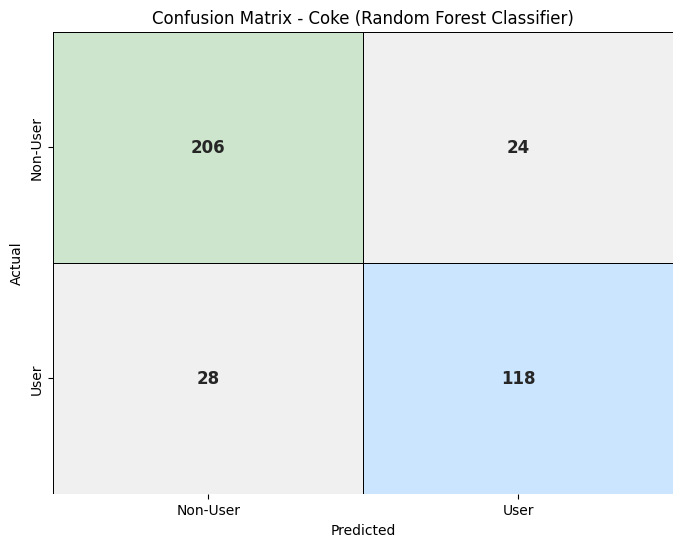


--------------------------------------------------

Processing: Crack
Training models...
Logistic Regression - Accuracy: 91.22%, F1-Score: 0.53521
Ridge Classifier - Accuracy: 90.16%, F1-Score: 0.43077
Support Vector Machines - Accuracy: 91.22%, F1-Score: 0.47619
Random Forest Classifier - Accuracy: 90.69%, F1-Score: 0.42623
XGBoost - Accuracy: 89.89%, F1-Score: 0.47222
Gradient Boost - Accuracy: 89.36%, F1-Score: 0.44444
Best Model for Crack: Logistic Regression with Accuracy 91.2234% with F1 Score: 0.5352


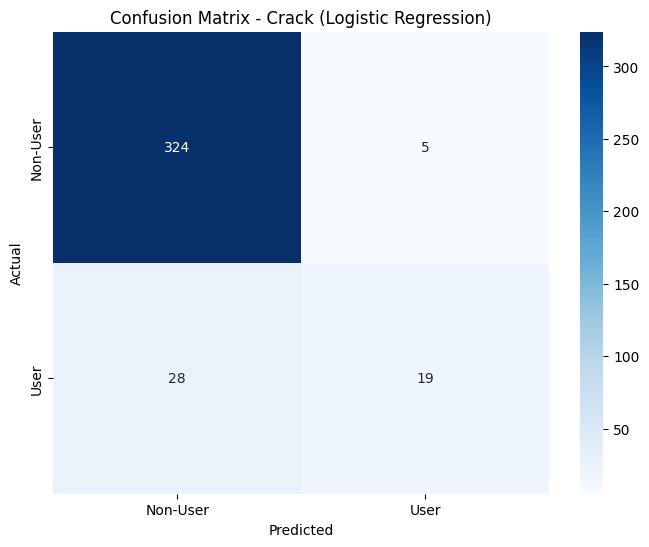

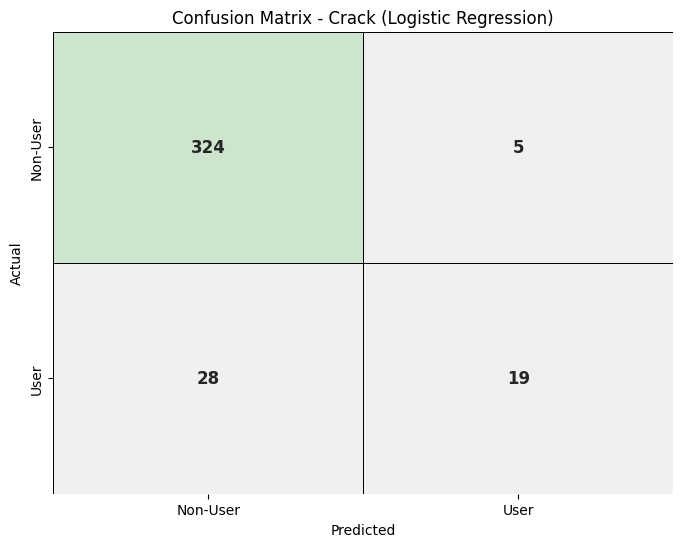


--------------------------------------------------

Processing: Ecstacy
Training models...
Logistic Regression - Accuracy: 86.44%, F1-Score: 0.83601
Ridge Classifier - Accuracy: 85.64%, F1-Score: 0.82237
Support Vector Machines - Accuracy: 86.70%, F1-Score: 0.84277
Random Forest Classifier - Accuracy: 87.50%, F1-Score: 0.85358
XGBoost - Accuracy: 85.90%, F1-Score: 0.82848
Gradient Boost - Accuracy: 86.17%, F1-Score: 0.83439
Best Model for Ecstacy: Random Forest Classifier with Accuracy 87.5000% with F1 Score: 0.8536


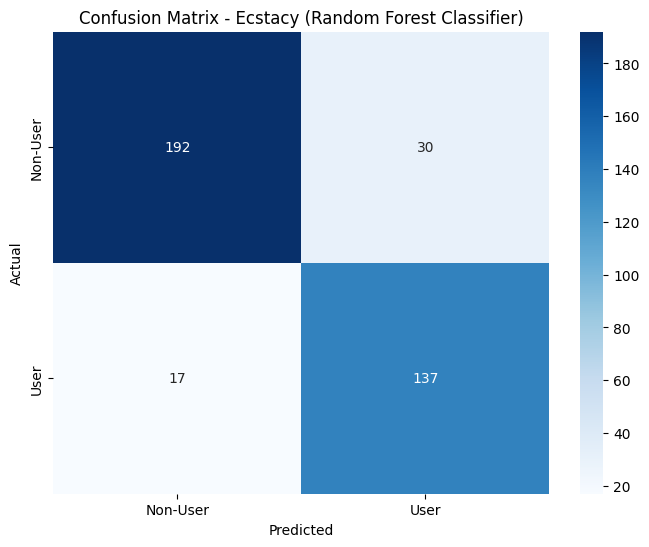

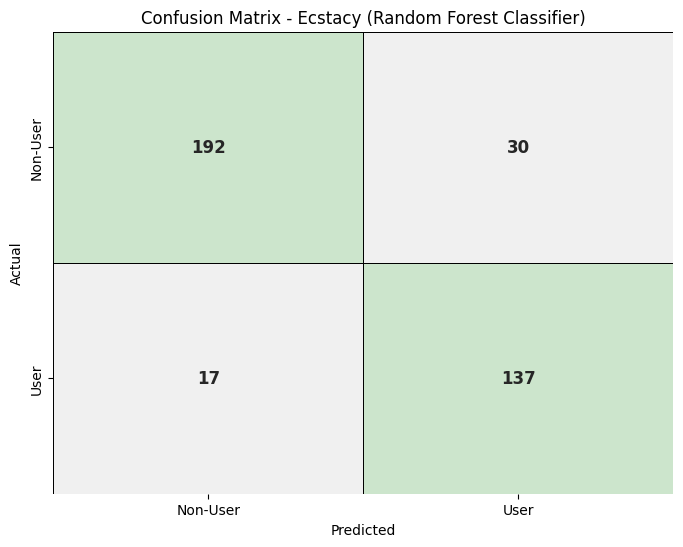


--------------------------------------------------

Processing: Heroin
Training models...
Logistic Regression - Accuracy: 92.55%, F1-Score: 0.65854
Ridge Classifier - Accuracy: 92.29%, F1-Score: 0.61333
Support Vector Machines - Accuracy: 92.55%, F1-Score: 0.63158
Random Forest Classifier - Accuracy: 94.41%, F1-Score: 0.72
XGBoost - Accuracy: 91.22%, F1-Score: 0.61176
Gradient Boost - Accuracy: 91.49%, F1-Score: 0.63636
Best Model for Heroin: Random Forest Classifier with Accuracy 94.4149% with F1 Score: 0.7200


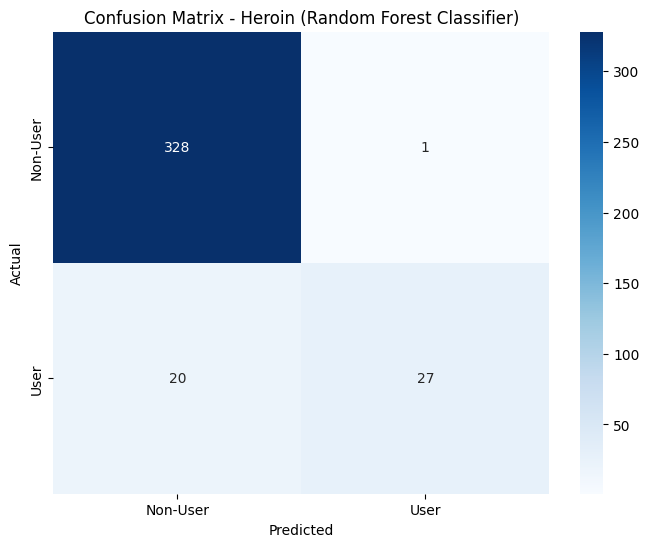

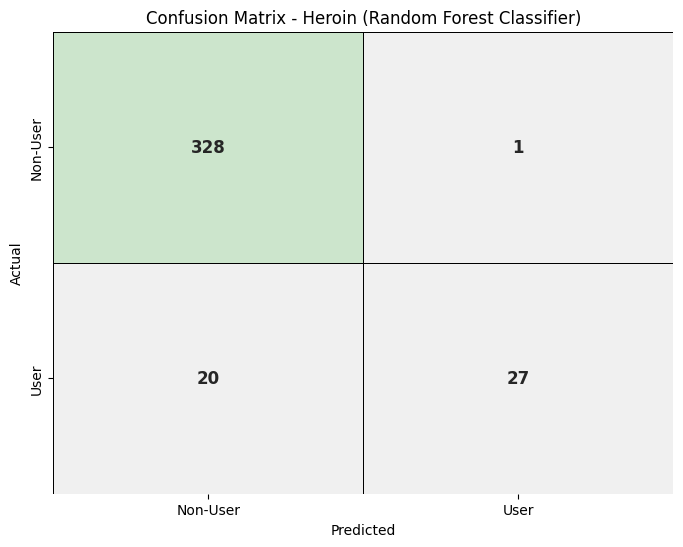


--------------------------------------------------

Processing: Ketamine
Training models...
Logistic Regression - Accuracy: 85.11%, F1-Score: 0.5942
Ridge Classifier - Accuracy: 84.57%, F1-Score: 0.55385
Support Vector Machines - Accuracy: 85.90%, F1-Score: 0.58268
Random Forest Classifier - Accuracy: 85.90%, F1-Score: 0.58915
XGBoost - Accuracy: 82.98%, F1-Score: 0.55556
Gradient Boost - Accuracy: 84.31%, F1-Score: 0.56934
Best Model for Ketamine: Logistic Regression with Accuracy 85.9043% with F1 Score: 0.5942


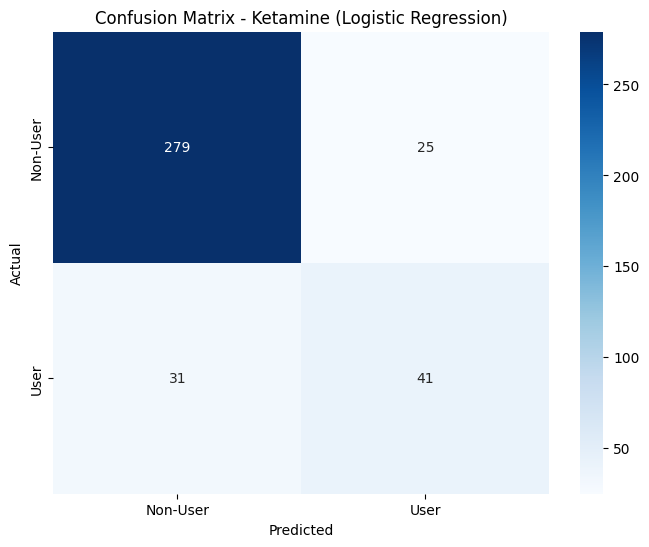

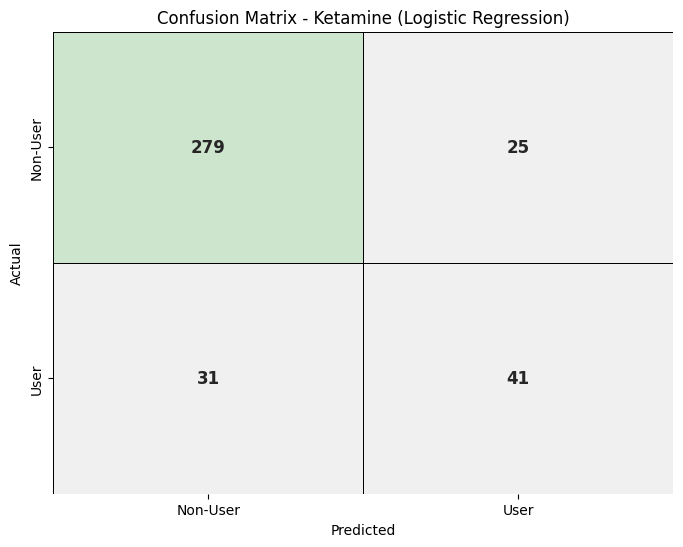


--------------------------------------------------

Processing: LegalH
Training models...
Logistic Regression - Accuracy: 82.18%, F1-Score: 0.78457
Ridge Classifier - Accuracy: 81.65%, F1-Score: 0.77955
Support Vector Machines - Accuracy: 82.71%, F1-Score: 0.79876
Random Forest Classifier - Accuracy: 82.71%, F1-Score: 0.8
XGBoost - Accuracy: 84.04%, F1-Score: 0.81366
Gradient Boost - Accuracy: 82.71%, F1-Score: 0.79751
Best Model for LegalH: XGBoost with Accuracy 84.0426% with F1 Score: 0.8137


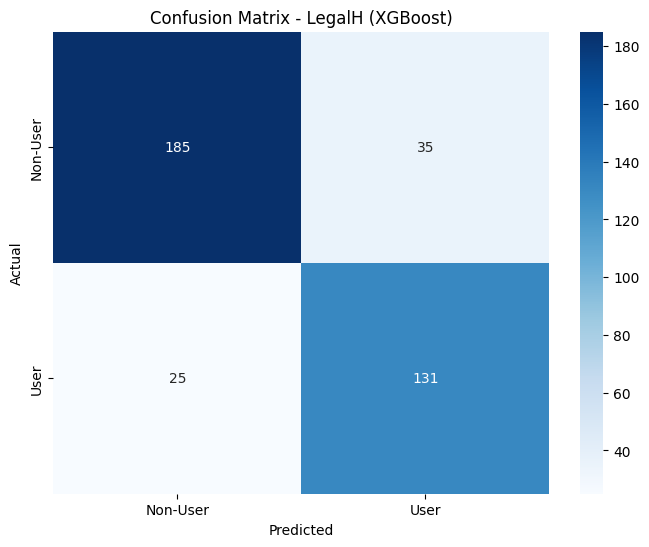

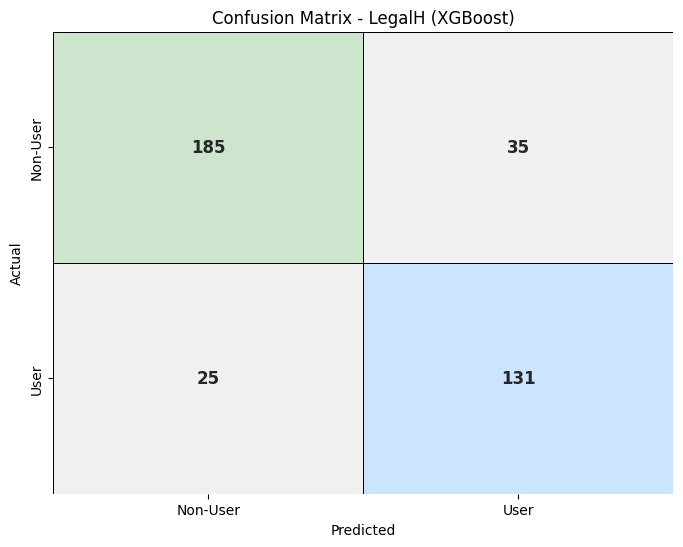


--------------------------------------------------

Processing: LSD
Training models...
Logistic Regression - Accuracy: 85.90%, F1-Score: 0.76444
Ridge Classifier - Accuracy: 86.70%, F1-Score: 0.78448
Support Vector Machines - Accuracy: 86.17%, F1-Score: 0.77391
Random Forest Classifier - Accuracy: 87.23%, F1-Score: 0.78947
XGBoost - Accuracy: 84.31%, F1-Score: 0.74009
Gradient Boost - Accuracy: 87.77%, F1-Score: 0.80672
Best Model for LSD: Gradient Boost with Accuracy 87.7660% with F1 Score: 0.8067


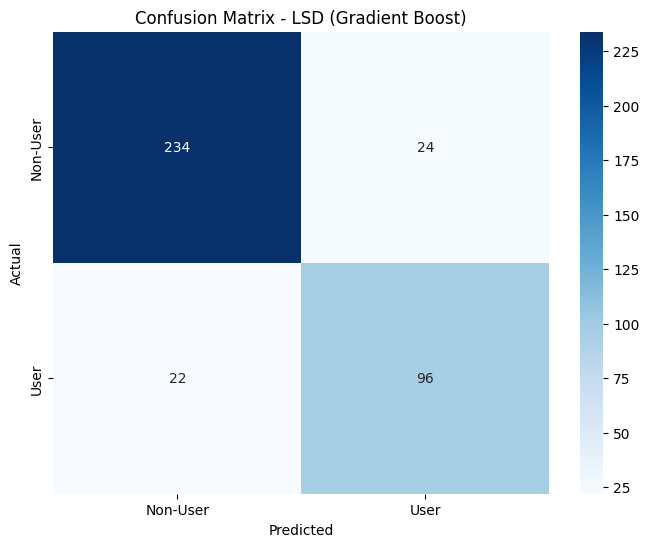

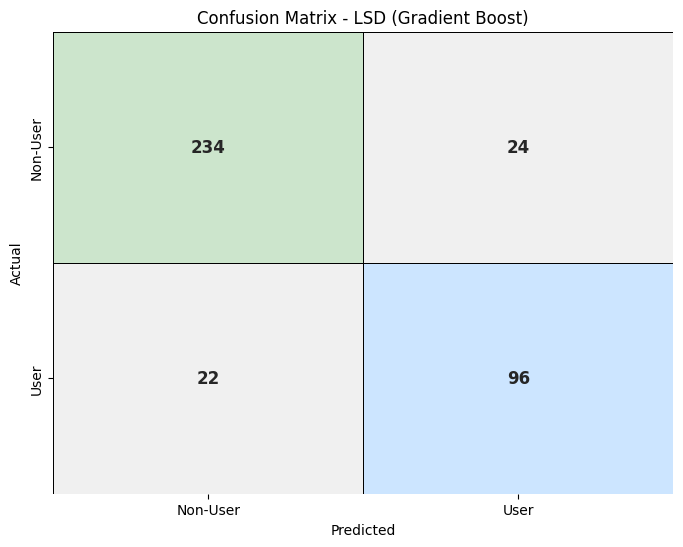


--------------------------------------------------

Processing: Meth
Training models...
Logistic Regression - Accuracy: 83.78%, F1-Score: 0.59603
Ridge Classifier - Accuracy: 85.37%, F1-Score: 0.61538
Support Vector Machines - Accuracy: 85.11%, F1-Score: 0.6
Random Forest Classifier - Accuracy: 85.11%, F1-Score: 0.61111
XGBoost - Accuracy: 86.17%, F1-Score: 0.65789
Gradient Boost - Accuracy: 87.23%, F1-Score: 0.69231
Best Model for Meth: Gradient Boost with Accuracy 87.2340% with F1 Score: 0.6923


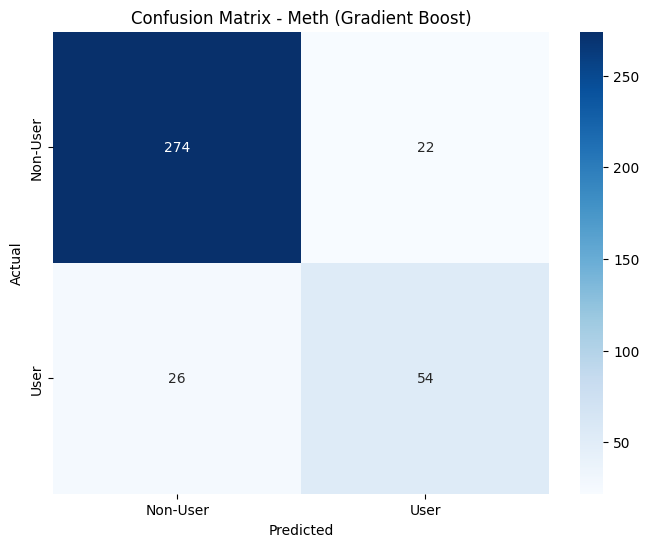

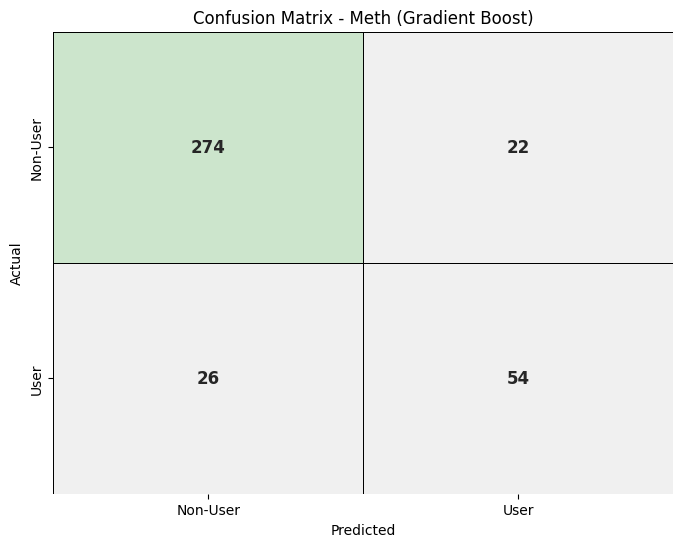


--------------------------------------------------

Processing: Mushrooms
Training models...
Logistic Regression - Accuracy: 82.45%, F1-Score: 0.77241
Ridge Classifier - Accuracy: 83.24%, F1-Score: 0.77895
Support Vector Machines - Accuracy: 83.51%, F1-Score: 0.79054
Random Forest Classifier - Accuracy: 86.97%, F1-Score: 0.83162
XGBoost - Accuracy: 86.44%, F1-Score: 0.82943
Gradient Boost - Accuracy: 84.57%, F1-Score: 0.80667
Best Model for Mushrooms: Random Forest Classifier with Accuracy 86.9681% with F1 Score: 0.8316


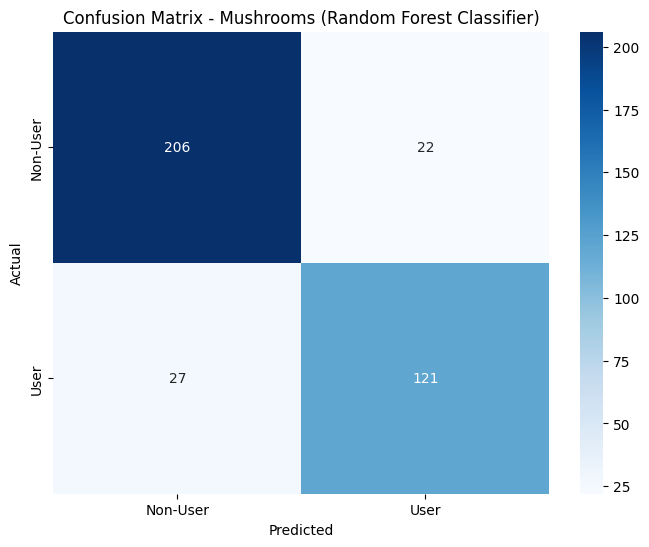

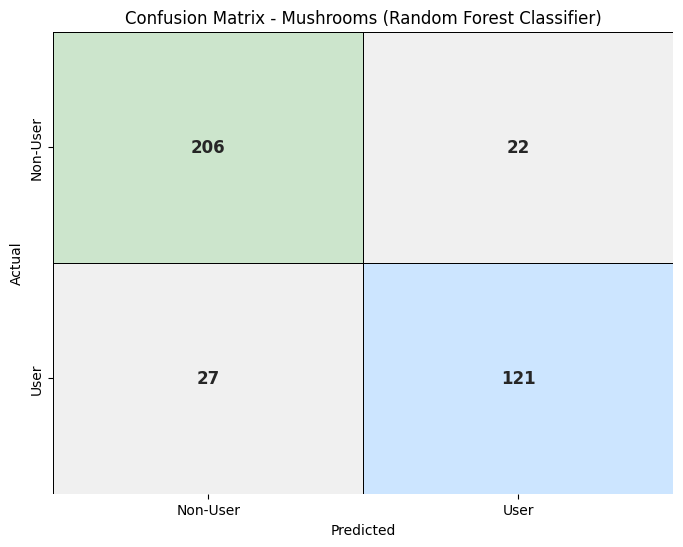


--------------------------------------------------

Processing: Nicotine
Training models...
Logistic Regression - Accuracy: 80.05%, F1-Score: 0.85323
Ridge Classifier - Accuracy: 81.12%, F1-Score: 0.8616
Support Vector Machines - Accuracy: 82.45%, F1-Score: 0.87452
Random Forest Classifier - Accuracy: 80.05%, F1-Score: 0.85981
XGBoost - Accuracy: 79.52%, F1-Score: 0.85389
Gradient Boost - Accuracy: 81.12%, F1-Score: 0.86528
Best Model for Nicotine: Support Vector Machines with Accuracy 82.4468% with F1 Score: 0.8745


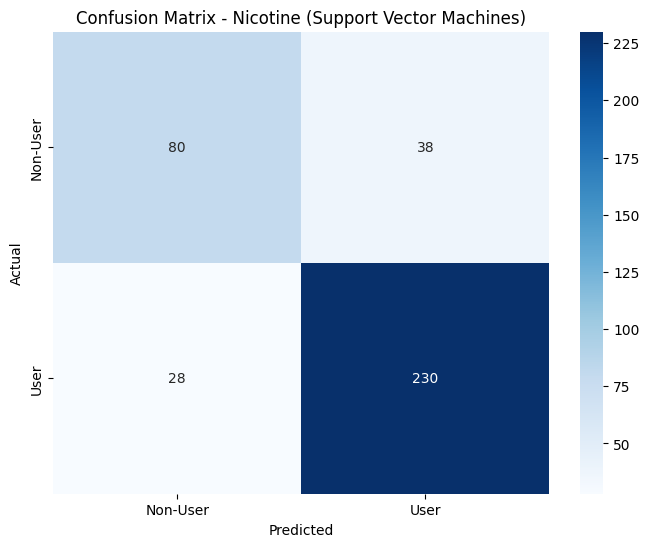

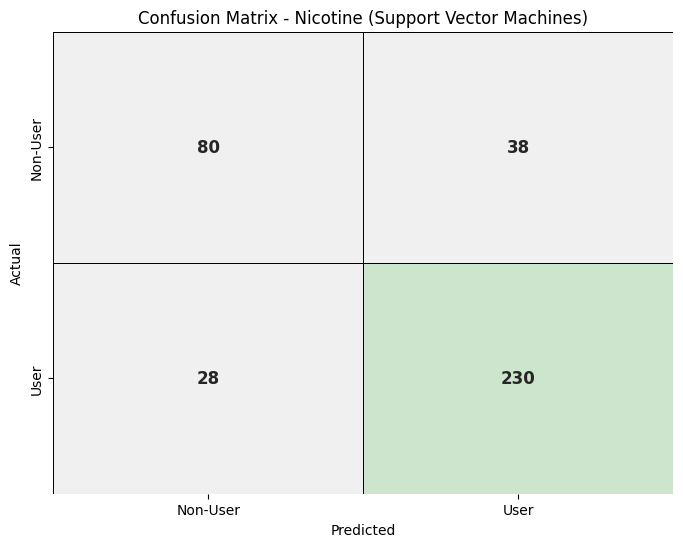


--------------------------------------------------

Processing: VSA
Training models...
Logistic Regression - Accuracy: 85.37%, F1-Score: 0.24658
Ridge Classifier - Accuracy: 85.90%, F1-Score: 0.070175
Support Vector Machines - Accuracy: 86.17%, F1-Score: 0.1875
Random Forest Classifier - Accuracy: 86.17%, F1-Score: 0.23529
XGBoost - Accuracy: 87.77%, F1-Score: 0.46512
Gradient Boost - Accuracy: 86.17%, F1-Score: 0.25714
Best Model for VSA: XGBoost with Accuracy 87.7660% with F1 Score: 0.4651


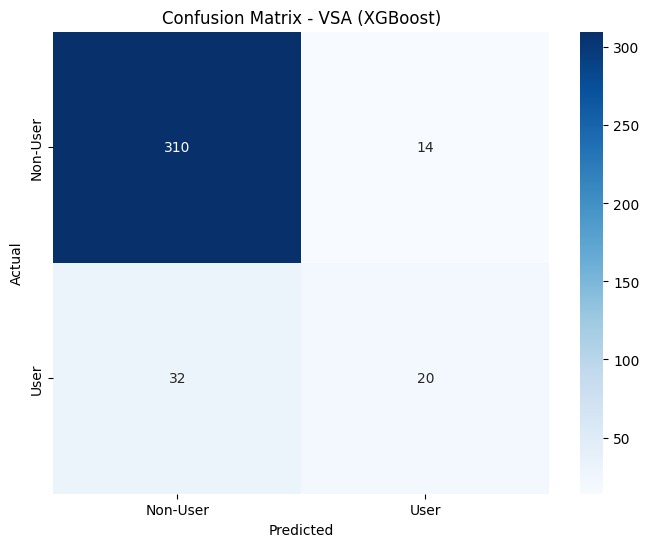

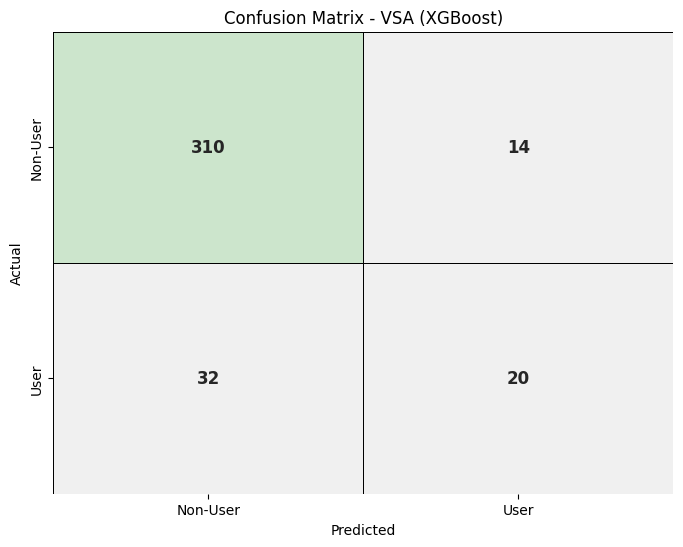


--------------------------------------------------



In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Ridge Classifier': RidgeClassifier(),
    'Support Vector Machines': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boost': GradientBoostingClassifier()
}
#substances
substances = [
    ('Alcohol', 'Alcohol_User'),
    ('Amphete', 'Amphete_User'),
    ('Amyl', 'Amyl_User'),
    ('Benzos', 'Benzos_User'),
    ('Caff', 'Caff_User'),
    ('Cannabis', 'Cannabis_User'),
    ('Coke', 'Coke_User'),
    ('Crack', 'Crack_User'),
    ('Ecstacy', 'Ecstacy_User'),
    ('Heroin', 'Heroin_User'),
    ('Ketamine', 'Ketamine_User'),
    ('LegalH', 'LegalH_User'),
    ('LSD', 'LSD_User'),
    ('Meth', 'Meth_User'),
    ('Mushrooms', 'Mushrooms_User'),
    ('Nicotine', 'Nicotine_User'),
    ('VSA', 'VSA_User')
]
#17 loops for the 17 substances
for substance, user_col in substances:
    print(f"Processing: {substance}")
    #data preprocessing
    df = data.copy()
    df[user_col] = df[substance].apply(lambda x: 1 if x not in [0, 1] else 0)
    df = df.drop([substance], axis=1)
    X_train, X_test, y_train, y_test = preprocessing_inputs(df, user_col)
    #class error skip
    if X_train is None:
        print(f"Skipping {substance} due to single-class target.")
        continue
    best_model = None
    best_acc = 0
    best_score = 0
    best_model_name = ""
    #training
    print("Training models...")
    for name, model in models.items():
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        acc = accuracy_score(y_test, yhat)
        f1 = f1_score(y_test, yhat, pos_label=1)
        print(f"{name} - Accuracy: {acc:.2%}, F1-Score: {f1:.5}")
        if f1 > best_score:
            best_score = f1
            best_model = model
            best_model_name = name
        if acc > best_acc:
            best_acc = acc
    best_acc = best_acc*100
    print(f"Best Model for {substance}: {best_model_name} with Accuracy {best_acc:.4f}% with F1 Score: {best_score:.4f}")
    #confusion matrix for the best model
    yhat_best = best_model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, yhat_best)

    #old confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-User', 'User'], yticklabels=['Non-User', 'User'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix - {substance} ({best_model_name})")
    plt.show()

    #alternate version of confusion matrix
    plt.figure(figsize=(8, 6))
    group_labels = np.array([["TN", "FP"], ["FN", "TP"]])
    group_counts = conf_matrix.flatten()
    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
    labels = [
        f"{group_labels[i, j]}\n{group_counts[i*2 + j]} ({group_percentages[i*2 + j]})"
        for i in range(2) for j in range(2)
    ]
    labels = np.array(labels).reshape(2, 2)
    colors = np.array([
        ["#cce5ff", "#f0f0f0"],  # TN-> light blue, FP-> neutral
        ["#f0f0f0", "#cce5cc"],  # FN-> neutral, TP-> light green
    ])
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap=sns.color_palette(["#f0f0f0", "#cce5ff", "#cce5cc"]),  #Neutral, Light Blue (TN), Light Green (TP)
        annot_kws={"size": 12, "weight": "bold"},
        xticklabels=['Non-User', 'User'],
        yticklabels=['Non-User', 'User'],
        cbar=False,
        linewidths=0.5,
        linecolor='black'
    )

    plt.title(f"Confusion Matrix - {substance} ({best_model_name})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("\n" + "-" * 50 + "\n")